In [88]:
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler  
from itertools import cycle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import math
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn import preprocessing
import os
from collections import Counter 
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.calibration import calibration_curve
import torch.optim as optim
import torchmetrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import json
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from pytorch_metric_learning import losses
from sklearn.metrics import precision_recall_curve, average_precision_score
from PIL import Image
from sklearn import preprocessing
from sklearn.metrics import classification_report
import torchvision.transforms as transforms
from datetime import datetime
from torchvision.transforms import Compose
import tempfile
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
import time
from collections import Counter 
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ExponentialLR, StepLR
import torch.nn.functional as F
from tqdm import tqdm, tqdm_notebook
import torchmetrics
import torch.nn as nn
from torch.autograd import Variable as V
from torch.autograd import grad
from torch.utils.data import DataLoader,Dataset, TensorDataset
seed = 42
import torch
from torch.nn import LeakyReLU, Linear, ReLU, MSELoss, Sequential, Conv1d, MaxPool1d, Module, Softmax, BatchNorm1d, Dropout
#from torchsummary import summary
import torchvision.models as models
import matplotlib.pyplot as plt

In [89]:
#!pip install torchmetrics
#!pip install pytorch_metric_learning

In [90]:
import matplotlib as mpl
import pylab
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.color'] = 'r'
mpl.rcParams['font.weight'] = 200
plt.style.use('seaborn-whitegrid')
plt.rc('figure',figsize=(20,14))
mpl.axes.Axes.annotate
mpl.rcParams['font.family'] = "serif"
pylab.rcParams['ytick.major.pad']='15'
pylab.rcParams['xtick.major.pad']='15'
mpl.rcParams['font.weight'] = "semibold"
mpl.rcParams['axes.labelsize'] = 40
mpl.rcParams['axes.linewidth'] = 4
mpl.rcParams['xtick.labelsize'] = 40
mpl.rcParams['ytick.labelsize'] = 40
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.titlesize'] = 40
mpl.rcParams['legend.fontsize'] = 30

In [91]:
def DA_Jitter(X, sigma=0.05):
    """Adds Gaussian noise (jitter) to the data."""
    myNoise = torch.randn_like(X) * sigma
    return X + myNoise


def rotate_features(X, degree=10, features_to_rotate=12):
    """Rotates the specified number of features by a given degree."""
    radians = torch.tensor(degree * (math.pi / 180)).to(X.device)

    rotation_matrix = torch.tensor([
        [torch.cos(radians), -torch.sin(radians)],
        [torch.sin(radians), torch.cos(radians)]
    ]).to(X.device)
    if X.ndim == 2 and X.shape[1] >= features_to_rotate:
        rotated = torch.matmul(X[:, :features_to_rotate].reshape(-1, 2), rotation_matrix)
        return torch.cat((rotated.reshape(X.shape[0], -1), X[:, features_to_rotate:]), dim=1)
    else:
        return X


def augment_data(X):
    """Applies jitter and rotation augmentations."""
    jittered_data = DA_Jitter(X)
    augmented_data = rotate_features(jittered_data)
    return augmented_data

In [92]:
#!pip install pytorch_metric_learning

In [93]:
def extract_data(persons, sensors):
    
    count1 = 0
            
    for person in persons:
        count = 0
        min_size = np.Inf
        data = None
        label = None
        for sensor in sensors:
            individual_data = np.load("../../dataset/Preprocessed_Data/"+person+"_"+sensor+"_testing_X_data.npy",allow_pickle=True)
            #print(individual_data.shape)
            if individual_data.shape[0] < min_size:
                min_size = individual_data.shape[0]
        
        for sensor in sensors:
            #print("dataset/processed/"+person+"_"+sensor+"_testing_X_data.npy")
            individual_data = np.load("../../dataset/Preprocessed_Data/"+person+"_"+sensor+"_testing_X_data.npy",allow_pickle=True)
            individual_data = individual_data[(individual_data.shape[0]-min_size):individual_data.shape[0],:,:]
            #print(individual_data.shape)
            individual_label = np.load("../../dataset/Preprocessed_Data/"+person+"_"+sensor+"_testing_Y_data.npy",allow_pickle=True)
            individual_label = individual_label[(individual_label.shape[0]-min_size):individual_label.shape[0]]
            if count==0:
                data = individual_data
                label = individual_label
                label = np.reshape(label,(label.shape[0],1))
            else:
                data = np.append(data,individual_data,axis=1)
                #label = np.append(label,individual_label,axis=0)
            count+=1
            print(person)
            print(data.shape)
            
        if count1==0:
            data_full = data
            label_full = label
        else:
            data_full = np.append(data_full,data,axis=0)
            label_full = np.append(label_full,label)
        count1+=1
        label_full = np.reshape(label_full,(label_full.shape[0],1))
    return np.asarray(data_full), np.asarray(label_full)

In [94]:
training_person = ['Zahid']
training_sensor = ['Hand','Palm','Right_Leg','Left_Leg'] 

testing_person = ['Sreeni']
testing_sensor = ['Hand','Palm','Right_Leg','Left_Leg']

In [95]:
source_data,source_labels = extract_data(training_person,training_sensor)
numOfRows = source_data.shape[1]
numOfColumns = source_data.shape[2]
#source_data = source_data.reshape(source_data.shape[0], numOfRows*numOfColumns)
source_data = source_data.astype(np.float32)#[0:5000]
source_labels = source_labels#[0:5000]

target_data,target_label = extract_data(testing_person,testing_sensor)
numOfRow = target_data.shape[1]
numOfColumn = target_data.shape[2]
#target_data  = target_data.reshape(target_data.shape[0], numOfRow*numOfColumn)
target_data = target_data.astype(np.float32)#[0:5000]

Zahid
(29021, 64, 12)
Zahid
(29021, 128, 12)
Zahid
(29021, 192, 12)
Zahid
(29021, 256, 12)
Sreeni
(22095, 64, 12)
Sreeni
(22095, 128, 12)
Sreeni
(22095, 192, 12)
Sreeni
(22095, 256, 12)


In [96]:
unique, counts = np.unique(source_labels, return_counts=True)
print(unique, counts)

['Backhand Service' 'Clear Lob Overhead Backhand'
 'Clear Lob Overhead Forehand' 'Clear Lob Underarm Backhand'
 'Clear Lob Underarm Forehand' 'Drop Shot Overhead Backhand'
 'Drop Shot Overhead Forehand' 'Forehand Service'
 'Net Shot Underarm Backhand' 'Net Shot Underarm Forehand'
 'Smash Overhead Backhand' 'Smash Overhead Forehand'] [2229 2872  957 2236 1920 2077  639 1914 2391 2390 4452 4944]


In [97]:
label_encoder = LabelEncoder()

source_label = label_encoder.fit_transform(source_labels)
print(source_label)

target_label = label_encoder.transform(target_label)
print(target_label)

[ 7  7  7 ... 10 10 10]
[ 7  7  7 ... 10 10 10]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [98]:
X_train ,X_test ,trn_y,val_y = train_test_split(source_data,source_label ,test_size=0.15)
x_train, x_test ,trn_Y,val_Y = train_test_split(target_data,target_label,test_size=0.2)

In [99]:
X_train.shape, x_train.shape, trn_y.shape

((24667, 256, 12), (17676, 256, 12), (24667,))

In [100]:
unique, counts = np.unique(source_label, return_counts=True)
print(unique, counts)

unique, counts = np.unique(target_label, return_counts=True)
print(unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11] [2229 2872  957 2236 1920 2077  639 1914 2391 2390 4452 4944]
[ 0  1  2  3  4  5  6  7  8  9 10 11] [ 158 1268  945 1437 1430 1804 1425 3330 1766 3347 2796 2389]


In [101]:
num_classes = 12

class HARDataset(Dataset):
    def __init__(self, data, labels=None):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        if self.labels is not None:
            return self.data[idx], self.labels[idx]
        return self.data[idx], idx
    
   # def __getitem__(self, idx):
    #    # Assuming 'self.data' contains your data
     #   data = self.data[idx]
      #  return data, idx  # Return both data and index

In [102]:
source_dataset = HARDataset(X_train, trn_y)
target_dataset = HARDataset(x_train)
eval_target = HARDataset(x_test, val_Y)#, val_y)
eval_source = HARDataset(X_test, val_y)
#eval_target = HARDataset(x_train, trn_Y)#, val_y)
#eval_source = HARDataset(X_train, trn_y)

# Create DataLoaders
source_dataloader = DataLoader(source_dataset, batch_size=64, shuffle=True)#, num_workers= 1)
target_dataloader = DataLoader(target_dataset, batch_size=64, shuffle=True)#, num_workers= 1)
eval_target_dataloader = DataLoader(eval_target, shuffle=True)#, num_workers= 1, batch_size=256)
eval_source_dataloader = DataLoader(eval_source, shuffle=True)#, num_workers= 1, batch_size=256)

In [103]:
source_data.shape, target_data.shape

((29021, 256, 12), (22095, 256, 12))

In [104]:
dataiter = iter(source_dataloader)
dataiter1 = iter(target_dataloader)
#dataiter2 = iter(Trans_Unlabel_train_loader)
data, label = dataiter.next()
#data1 = dataiter1.next()

print(type(data))

print(data.shape)
print(label.shape)

#print(type(data1))
#print(data1.shape)

<class 'torch.Tensor'>
torch.Size([64, 256, 12])
torch.Size([64])


In [105]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [106]:
class HARmodel(nn.Module):
    def __init__(self):
        super(HARmodel, self).__init__()
        self.conv1 = nn.Conv1d(12,32,5)
        self.conv2 = nn.Conv1d(32,128, 5)
        self.conv3 = nn.Conv1d(128, 64, 5)
       # self.conv4 = nn.Conv1d(100, 32, 5)
        self.bn1 = nn.BatchNorm1d(32)
        self.bn2 = nn.BatchNorm1d(128)
        self.bn3 = nn.BatchNorm1d(64)
        #self.bn2 = nn.BatchNorm1d(196)
        
        self.drop = nn.Dropout(p=0.3)
        self.maxpool1 = nn.MaxPool1d(1, stride=1)
        x = torch.randn(1, 12, 256)
        self._to_linear = None
        self.convs(x)
    
        self.fc = nn.Linear(self._to_linear, 8)
        #self.fc2 = nn.Linear(2, 4)
        #self.fc3 = nn.Linear(4, 8)
        self.fc4 = nn.Linear(8, 4)
        self.fc5 = nn.Linear(4, 12)
    
    
    def convs(self, x):

        x = (self.drop(self.maxpool1(self.bn1(F.relu(self.conv1(x))))))
        x = ((self.maxpool1(self.bn2(F.relu(self.conv2(x))))))
        x = (self.drop(self.maxpool1(self.bn3(F.relu(self.conv3(x))))))
        #x = ((self.maxpool1((F.relu(self.conv4(x))))))
    
        
        if self._to_linear is None:
            self._to_linear = x[0].shape[0]*x[0].shape[1]
        return x
        
    def forward(self, x):

        x = torch.reshape(x, (-1, 12, 256))
        x = (self.drop(self.maxpool1(self.bn1(F.relu(self.conv1(x))))))
        x = ((self.maxpool1(self.bn2(F.relu(self.conv2(x))))))
        x = (self.drop(self.maxpool1(self.bn3(F.relu(self.conv3(x))))))
        #x = ((self.maxpool1((F.relu(self.conv4(x))))))
        
        x = x.view(-1, self._to_linear)
        x = F.relu(self.fc(x))
        #x = F.relu(self.fc2(x))
        #x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        
        x = self.fc5(x)

        return x

In [107]:
model = HARmodel().to(device)
print(model)

def num_params(model):
    return sum([p.numel() for p in model.parameters() if p.requires_grad])

print(f"Total number of parameters: {num_params(model) / 1e3}k")

HARmodel(
  (conv1): Conv1d(12, 32, kernel_size=(5,), stride=(1,))
  (conv2): Conv1d(32, 128, kernel_size=(5,), stride=(1,))
  (conv3): Conv1d(128, 64, kernel_size=(5,), stride=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.3, inplace=False)
  (maxpool1): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=15616, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=4, bias=True)
  (fc5): Linear(in_features=4, out_features=12, bias=True)
)
Total number of parameters: 189.064k


In [108]:
# Cross-Entropy Loss for the source domain
classification_loss_fn = nn.CrossEntropyLoss()
kl_divergence_loss = nn.KLDivLoss(reduction='mean').cuda()


# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.0001)

#def generate_pseudo_labels(target_pred):
    # Calculate probabilities
 #   probabilities = torch.softmax(target_pred, dim=1)
    
    # Find the max probability for each prediction
  #  max_probs, pseudo_labels = torch.max(probabilities, dim=1)

    # Find the overall highest probability in the batch
   # highest_probability = max_probs.max()

    # Select pseudo-labels where the prediction probability equals the highest probability in the batch
   # pseudo_labels[max_probs < highest_probability] = -1  # Assign -1 to less confident predictions
    #return pseudo_labels

In [109]:
def kl_for_log_probs(log_p, prob_q):
    """
    Compute KL divergence between log probabilities and probabilities.
    Args:
        log_p: Tensor of log probabilities (predicted distribution, log P).
        prob_q: Tensor of probabilities (target distribution, Q).

    Returns:
        KL divergence for each example in the batch.
    """
    p = torch.exp(log_p)  # Convert log P to P
    kl = torch.sum(p * (log_p - torch.log(prob_q + 1e-10)), dim=-1)  # Small constant for numerical stability
    return kl

def kl_div_loss(tgt_ori_log_probs, aug_probs):
    """
    Calculate the mean KL divergence loss for a batch of data in PyTorch.
    Args:
        tgt_ori_log_probs: Tensor of log probabilities from the original target data (log P).
        aug_probs: Tensor of probabilities from the augmented data (Q).

    Returns:
        Mean KL divergence loss.
    """
    per_example_kl_loss = kl_for_log_probs(tgt_ori_log_probs, aug_probs)
    mean_kl_loss = torch.mean(per_example_kl_loss)
    return mean_kl_loss

# CMMD loss
Classwise Alignmnet without gaussian kernel based - Regularization is used because CMMD loss essentially measures the squared norm of the difference between the mean features of corresponding classes from source and target dataset i.e. if the means are very close to each other, the squared norm might become very small/neglible, potentially leading to numerical instability during optimization. This regularization is done direclt on feature space 

# CMMD loss with Gaussian Kernel-based alignment

In [111]:
def rbf_kernel(X1, X2, gamma=1.0):
    """
    Compute the RBF (Gaussian) kernel between X1 and X2.
    :param X1: A tensor of size [n_samples_1, n_features].
    :param X2: A tensor of size [n_samples_2, n_features].
    :param gamma: Kernel coefficient.
    """
    sq_dist = torch.cdist(X1, X2)**2
    return torch.exp(-gamma * sq_dist)

# Regularization based CMMD loss 
Kernel (regularization added directly to the kernel matrix, impacting the kernelized feature space - motivation is prevent overfitting and to enhance the stability - singularity or ill-conditioning during during matrix inversion or eigenvalue decomposition.

# Provided the best results

In [112]:
def cmmd_loss(source_features, source_labels, target_features, target_pseudo_labels, num_classes, gamma=1.0, lambda_reg=0.6):
    cmmd_loss = 0.0
    classes = 0

    for class_idx in range(num_classes):
        source_class_features = source_features[source_labels == class_idx]
        target_class_features = target_features[target_pseudo_labels == class_idx]

        # Skip if either class has too few samples
        if len(source_class_features) < 100 or len(target_class_features) < 100:
            continue

        # Compute the kernel matrices with regularization
        K_ss = rbf_kernel(source_class_features, source_class_features, gamma) + lambda_reg * torch.eye(len(source_class_features)).to(source_features.device)
        K_tt = rbf_kernel(target_class_features, target_class_features, gamma) + lambda_reg * torch.eye(len(target_class_features)).to(target_features.device)
        K_st = rbf_kernel(source_class_features, target_class_features, gamma)

        # Compute mean discrepancy in kernel space
        mean_discrepancy = torch.mean(K_ss) + torch.mean(K_tt) - 2 * torch.mean(K_st)

        cmmd_loss += mean_discrepancy
        classes += 1

    if classes == 0:
        return torch.tensor(0.0).to(source_features.device)

    return cmmd_loss / classes


# Temporal Ensembling + Consistency + CMMD loss

In [142]:
ensemble_predictions = torch.zeros(len(target_dataset), num_classes).to(device)
ensemble_counts = torch.zeros(len(target_dataset)).to(device)

best_model_state_dict = None
best_accuracy = 0.0
weight_cmmd = 1.0
weight_kl = 1.0
num_epochs = 128
num_classes = 12
alpha = 0.6
total_loss_list = []
total_acc_list = []

save_folder = 'Model_checkpoints'
os.makedirs(save_folder, exist_ok=True) 

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    source_iter = iter(source_dataloader)
    target_iter = iter(target_dataloader)

    for _ in range(min(len(source_dataloader), len(target_dataloader))):
        source_x, source_y = next(source_iter)
        target_x, target_indices = next(target_iter)

        source_x, source_y, target_x = source_x.to(device), source_y.to(device), target_x.to(device)

        # Forward pass on source data
        optimizer.zero_grad()
        source_pred = model(source_x)
        loss_source = classification_loss_fn(source_pred, source_y)
        correct_predictions += (source_pred.argmax(1) == source_y).sum().item()
        total_predictions += source_y.size(0)

        # Forward pass on target data
        target_pred = model(target_x)
        target_pred_softmax = F.softmax(target_pred, dim=1)

        # Temporal ensembling update
        ensemble_predictions[target_indices] *= alpha
        ensemble_predictions[target_indices] += (1 - alpha) * target_pred_softmax.detach()
        ensemble_counts[target_indices] += 1

        # Generate pseudo labels from ensemble
        ensemble_avg = ensemble_predictions[target_indices] / ensemble_counts[target_indices].unsqueeze(1)
        target_pseudo_labels = torch.argmax(ensemble_avg, dim=1)
        
        
        # CMMD loss
        loss_cmmd = cmmd_loss(source_pred, source_y, target_pred, target_pseudo_labels, num_classes)
        # KL loss
        #loss_kl = kl_divergence_loss(source_pred, target_pred)
        # MMD loss
        #loss_mmd = mmd_loss(source_pred, target_pred)

        
        
        # Data augmentation and KL loss for consistency
        target_x_augmented = augment_data(target_x).to(device)
        #print(target_x[0])
        #print(target_x_augmented[0])
        target_pred_augmented = model(target_x_augmented)
        loss_kl = kl_div_loss(target_pred_augmented, target_pred_softmax)
        
        #print(loss_kl) 

        # Combine losses -  Temporal + cmmd
        loss = loss_source + weight_cmmd * loss_cmmd + weight_kl * loss_kl
        # Temporal only
        loss = loss_source + weight_kl * loss_kl
        
        #loss = weight_kl * loss_kl
        total_loss += loss.item()
        #print(total_loss)

        # Backward and optimize
        loss.backward()
        optimizer.step()

    epoch_loss = total_loss / min(len(source_dataloader), len(target_dataloader))
    epoch_accuracy = correct_predictions / total_predictions
    total_loss_list.append(epoch_loss)
    total_acc_list.append(epoch_accuracy)
    

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")
    
    if  epoch_accuracy  > best_accuracy:
        best_accuracy = epoch_accuracy 
        best_model_state_dict = model.state_dict()

# Save the best model checkpoint
        if best_model_state_dict is not None:

    # Save the best model checkpoint with a timestamp
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            filename = f"best_model_{timestamp}_accuracy{best_accuracy:.4f}.pt"
            save_path = os.path.join(save_folder, filename)
            torch.save(best_model_state_dict, save_path)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2723: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  "reduction: 'mean' divides the total loss by both the batch size and the support size."


Epoch [1/128], Loss: 0.1877, Accuracy: 0.9399
Epoch [2/128], Loss: 0.1743, Accuracy: 0.9449
Epoch [3/128], Loss: 0.1774, Accuracy: 0.9434
Epoch [4/128], Loss: 0.1765, Accuracy: 0.9418
Epoch [5/128], Loss: 0.1750, Accuracy: 0.9433
Epoch [6/128], Loss: 0.1731, Accuracy: 0.9447
Epoch [7/128], Loss: 0.1790, Accuracy: 0.9408
Epoch [8/128], Loss: 0.1739, Accuracy: 0.9437
Epoch [9/128], Loss: 0.1611, Accuracy: 0.9499
Epoch [10/128], Loss: 0.1713, Accuracy: 0.9435
Epoch [11/128], Loss: 0.1743, Accuracy: 0.9434
Epoch [12/128], Loss: 0.1772, Accuracy: 0.9417
Epoch [13/128], Loss: 0.1688, Accuracy: 0.9459
Epoch [14/128], Loss: 0.1576, Accuracy: 0.9496
Epoch [15/128], Loss: 0.1595, Accuracy: 0.9476
Epoch [16/128], Loss: 0.1579, Accuracy: 0.9490
Epoch [17/128], Loss: 0.1527, Accuracy: 0.9506
Epoch [18/128], Loss: 0.1507, Accuracy: 0.9510
Epoch [19/128], Loss: 0.1557, Accuracy: 0.9495
Epoch [20/128], Loss: 0.1547, Accuracy: 0.9519
Epoch [21/128], Loss: 0.1553, Accuracy: 0.9505
Epoch [22/128], Loss: 

# Marginal Alignment

In [ ]:
weight_kl = 0.3
num_epochs = 50
total_loss_list = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    min_len = min(len(source_dataloader), len(target_dataloader))

    for _ in range(min_len):
        source_data = next(iter(source_dataloader))
        target_data = next(iter(target_dataloader))

    # Unpack and convert to tensor if necessary
        source_x, source_y = source_data if isinstance(source_data, tuple) else (source_data[0], source_data[1])
        target_x = target_data if isinstance(target_data, torch.Tensor) else target_data[0]

    # Move to device
        source_x, source_y, target_x = source_x.to(device), source_y.to(device), target_x.to(device)
        optimizer.zero_grad()

        # Process source labels
        if source_y.ndim > 1 and source_y.shape[1] > 1:
            source_y = torch.argmax(source_y, dim=1)

        # Forward pass on source and target data
        source_pred = model(source_x)
        target_pred = model(target_x)

        # Classification loss on source domain
        loss_source = classification_loss_fn(source_pred, source_y)
        correct_predictions += (source_pred.argmax(1) == source_y).sum().item()
        total_predictions += source_y.size(0)

        # KL Divergence loss for domain adaptation
        loss_kl = kl_divergence_loss(source_pred, target_pred)

        # Combine losses
        loss = loss_source + weight_kl * loss_kl
        total_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    epoch_loss = total_loss / min_len
    epoch_accuracy = correct_predictions / total_predictions
    total_loss_list.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

In [ ]:
weight_kl = 0.3
num_epochs = 50
total_loss_list = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    min_len = min(len(source_dataloader), len(target_dataloader))

    for i in range(min_len):
        source_x, source_y = next(iter(source_dataloader))
        target_x = next(iter(target_dataloader)) 

        source_x, source_y, target_x = source_x.to(device), source_y.to(device), target_x.to(device)
        optimizer.zero_grad()

        if source_y.ndim > 1 and source_y.shape[1] > 1:
            source_y = torch.argmax(source_y, dim=1)

        source_pred = model(source_x)
        loss_source = classification_loss_fn(source_pred, source_y)
        _, predicted_labels = torch.max(source_pred, 1)
        correct_predictions += (predicted_labels == source_y).sum().item()
        total_predictions += source_y.size(0)

        target_pred = model(target_x)
        #target_pred_log_softmax = torch.log_softmax(target_pred, dim=-1)
        # Generate pseudo labels for target domain or use a predefined distribution
        # Example: Using the model's own predictions as pseudo labels
        pseudo_labels = torch.softmax(target_pred, dim=-1)

        # Compute KL divergence loss
        loss_target = kl_divergence_loss(target_pred, source_pred)
        #loss_cmmd = cmmd_loss(source_features, source_y, target_features, target_pseudo_labels, num_classes)

        loss = loss_source + weight_kl * loss_target 
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    epoch_loss = total_loss / min_len
    epoch_accuracy = correct_predictions / total_predictions
    total_loss_list.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# Baseline

In [ ]:
num_epochs = 50
total_loss_list = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    min_len = len(source_dataloader)#, len(target_dataloader))

    for i in range(min_len):
        source_x, source_y = next(iter(source_dataloader))
        #target_x = next(iter(target_dataloader))

        source_x, source_y = source_x.to(device), source_y.to(device)
        optimizer.zero_grad()

        if source_y.ndim > 1 and source_y.shape[1] > 1:
            source_y = torch.argmax(source_y, dim=1)

        source_pred = model(source_x)
        loss_source = classification_loss_fn(source_pred, source_y)
        _, predicted_labels = torch.max(source_pred, 1)
        correct_predictions += (predicted_labels == source_y).sum().item()
        total_predictions += source_y.size(0)

        # loss
        loss = loss_source 
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
    epoch_loss = total_loss / min_len
    epoch_accuracy = correct_predictions / total_predictions
    total_loss_list.append(epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

# Loss Plots

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(total_loss_list, 'black', linestyle= 'dotted') #linestyle='loosely dotted')#, epoc3, 'orange') #epoc4, 'gold')
plt.xlabel('Epochs', weight="semibold")
#subscript = ' _(Loss)'
#plt.ylabel("Loss")
plt.ylabel("$T_{Loss}$")
#plt.ylabel('Total Loss', weight="semibold")
#plt.ylim(1.5, 2)
plt.legend(['Training Loss'], prop=dict(weight='semibold'))  
#plt.savefig('Images/Total_Loss_CMMD_kernel.png',dpi=300, bbox_inches='tight')

# Eval Confusion Matrix and F1 score

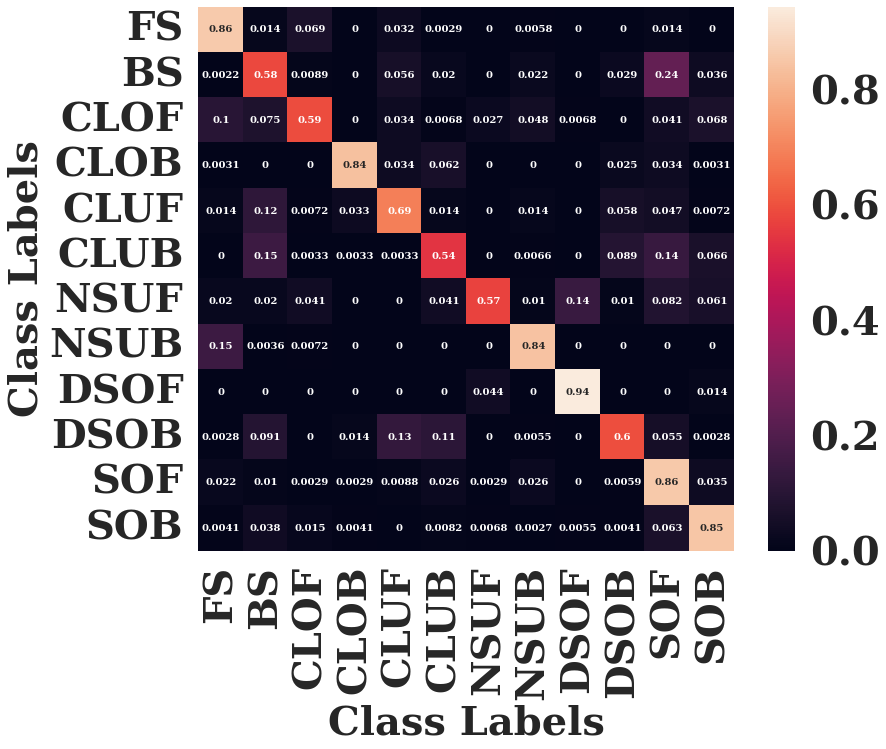

0.7373259559922395 0.7497810844854462 0.7300174796592594 0.7625172255397336


In [27]:
model.eval()  # Set the model to evaluation mode
true_labels = []
pred_labels = []
embeddings = []

with torch.no_grad():  # No need to track gradients
    for source_batch, target_batch in zip(eval_source_dataloader, eval_target_dataloader):
        # Process source data
        #source_inputs, _ = source_batch
        #source_features = model(source_inputs.to(device))

        # Process target data    
        target_inputs, target_labels = target_batch
        target_inputs = target_inputs.to(device)
        target_labels = target_labels.to(device)
        target_outputs = model(target_inputs)
        target_features = target_outputs  
        _, predicted = torch.max(target_outputs, 1)
        true_labels.extend(target_labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())
        embeddings.append(target_features.detach().cpu().numpy())
        
    # Calculate the macro F1 score
    
#classes = ['Forehand Service','Backhand Service','Clear Lob Overhead Forehand','Clear Lob Overhead Backhand',
 #          'Clear Lob Underarm Forehand','Clear Lob Underarm Backhand','Net Shot Underarm Forehand',
  #         'Net Shot Underarm Backhand','Drop Shot Overhead Forehand','Drop Shot Overhead Backhand',
   #       'Smash Overhead Forehand','Smash Overhead Backhand']

classes = ['FS','BS','CLOF','CLOB','CLUF','CLUB','NSUF','NSUB','DSOF','DSOB','SOF','SOB']
    

# Confusion matrix
cf_matrix = confusion_matrix(true_labels, pred_labels)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Class Labels', fontweight='semibold')
plt.ylabel('Class Labels', fontweight='semibold')
#plt.savefig("Images/New_Confusion_Matrix_BAR_Gender_Variations.png", format='png',bbox_inches='tight', pad_inches=0,dpi=300)
plt.show()

macro_f1 = f1_score(true_labels, pred_labels, average='macro')
precision = precision_score(true_labels, pred_labels, average = 'macro')
recall = recall_score(true_labels, pred_labels, average = 'macro')
accuracy = accuracy_score(true_labels, pred_labels)
print(macro_f1, precision, recall, accuracy)
# Calculating AUROC

# Create a DataFrame to hold the metrics
data = {
    'Macro F1-Score': [macro_f1],
    'Precision': [precision],
    'Recall': [recall],
    'Accuracy': [accuracy]
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('model_metrics_only_UDA.csv', index=False)

print("Metrics saved to model_metrics.csv")


# ROC

In [ ]:
# Assuming true_labels and pred_labels are defined
# num_classes is set to a dynamic value that might change, adjust as necessary
num_classes = 12  # Adjusted to the dynamic setting

# Binarize the output labels
y_true_bin = label_binarize(true_labels, classes=np.arange(num_classes))
y_pred_bin = label_binarize(pred_labels, classes=np.arange(num_classes))

# Initialize dictionaries
fpr = dict()
tpr = dict()
roc_auc = dict()

# Adjust the range here to limit to top 4 classes
top_classes = 4
for i in range(top_classes):  # Now iterates only over the first 4 classes
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area for top classes
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(top_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(top_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= top_classes

fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plotting
plt.figure(figsize=(10, 8))

# Adjust the color cycle if you wish to have specific colors for each class
colors = cycle(['blue', 'red', 'green', 'cyan'])
for i, color in zip(range(top_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlabel('False Positive Rate', fontsize=40)
plt.ylabel('True Positive Rate', fontsize=40)
plt.legend(loc='lower right', prop={'weight': 'semibold', 'size': 20}, ncol=1)
#plt.savefig("Images/AUROC_BAR.png", format='png', bbox_inches='tight', pad_inches=0, dpi=300)

# Analysis alpha Values

In [22]:
def calculate_entropy(predictions):
    predictions = torch.clamp(predictions, 1e-9, 1)  # Prevent log(0)
    entropy = (-predictions * torch.log(predictions)).sum(dim=1).mean().item()
    return entropy

In [23]:
def train_and_evaluate(model, source_dataloader, target_dataloader, optimizer, device, alpha, num_epochs=128, num_classes=12):
    ensemble_predictions = torch.zeros(len(target_dataloader.dataset), num_classes).to(device)
    ensemble_counts = torch.zeros(len(target_dataloader.dataset)).to(device)
    best_accuracy = 0.0
    total_loss_list = []
    total_acc_list = []
    average_entropy_list = []

    save_folder = 'Model_checkpoints'
    os.makedirs(save_folder, exist_ok=True)

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        epoch_entropy = []

        source_iter = iter(source_dataloader)
        target_iter = iter(target_dataloader)

        for _ in range(min(len(source_dataloader), len(target_dataloader))):
            source_x, source_y = next(source_iter)
            target_x, target_indices = next(target_iter)

            source_x, source_y, target_x = source_x.to(device), source_y.to(device), target_x.to(device)
            optimizer.zero_grad()

            # Forward pass on source data
            source_pred = model(source_x)
            loss_source = classification_loss_fn(source_pred, source_y)
            correct_predictions += (source_pred.argmax(1) == source_y).sum().item()
            total_predictions += source_y.size(0)

            # Forward pass on target data
            target_pred = model(target_x)
            target_pred_softmax = F.softmax(target_pred, dim=1)

            # Temporal ensembling update
            ensemble_predictions[target_indices] *= alpha
            ensemble_predictions[target_indices] += (1 - alpha) * target_pred_softmax.detach()
            ensemble_counts[target_indices] += 1

            # Calculate entropy for the batch and accumulate
            batch_entropy = calculate_entropy(ensemble_predictions[target_indices] / ensemble_counts[target_indices].unsqueeze(1))
            epoch_entropy.append(batch_entropy)

            # Combine losses and optimize
            loss = loss_source
            total_loss += loss.item()
            loss.backward()
            optimizer.step()

        # Record epoch-wise metrics
        epoch_loss = total_loss / min(len(source_dataloader), len(target_dataloader))
        epoch_accuracy = correct_predictions / total_predictions
        total_loss_list.append(epoch_loss)
        total_acc_list.append(epoch_accuracy)
        average_entropy_list.append(np.mean(epoch_entropy))

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}, Entropy: {np.mean(epoch_entropy):.4f}")

    return total_loss_list, total_acc_list, average_entropy_list

In [24]:
alpha = 0.7  # Example alpha value
num_epochs = 128
num_classes = 12

total_loss_list, total_acc_list, average_entropy_list = train_and_evaluate(model, source_dataloader, target_dataloader, optimizer, device, alpha, num_epochs, num_classes)
entropy_save_path = f'entropy_values_alpha_{alpha}.npy'
np.save(entropy_save_path, np.array(average_entropy_list))
print(f"Saved entropy values for alpha={alpha} to {entropy_save_path}")

# Plotting the average entropy over epochs
#plt.plot(range(1, num_epochs + 1), average_entropy_list, label=f'Alpha={alpha}')
#plt.xlabel('Epoch')
#plt.ylabel('Average Entropy')
#plt.title('Entropy of Ensemble Predictions Across Epochs')
#plt.legend()
#plt.show()

Epoch [1/128], Loss: 2.1647, Accuracy: 0.2957, Entropy: 1.0477
Epoch [2/128], Loss: 1.9477, Accuracy: 0.3660, Entropy: 0.9243
Epoch [3/128], Loss: 1.8178, Accuracy: 0.4041, Entropy: 0.8218
Epoch [4/128], Loss: 1.7146, Accuracy: 0.4395, Entropy: 0.7351
Epoch [5/128], Loss: 1.6100, Accuracy: 0.4602, Entropy: 0.6617
Epoch [6/128], Loss: 1.5177, Accuracy: 0.4966, Entropy: 0.5983
Epoch [7/128], Loss: 1.4317, Accuracy: 0.5265, Entropy: 0.5437
Epoch [8/128], Loss: 1.3561, Accuracy: 0.5385, Entropy: 0.4967
Epoch [9/128], Loss: 1.3022, Accuracy: 0.5574, Entropy: 0.4556
Epoch [10/128], Loss: 1.2552, Accuracy: 0.5741, Entropy: 0.4204
Epoch [11/128], Loss: 1.2239, Accuracy: 0.5838, Entropy: 0.3901
Epoch [12/128], Loss: 1.1962, Accuracy: 0.5992, Entropy: 0.3643
Epoch [13/128], Loss: 1.1592, Accuracy: 0.6096, Entropy: 0.3416
Epoch [14/128], Loss: 1.1378, Accuracy: 0.6223, Entropy: 0.3214
Epoch [15/128], Loss: 1.1155, Accuracy: 0.6331, Entropy: 0.3036
Epoch [16/128], Loss: 1.0950, Accuracy: 0.6410, E

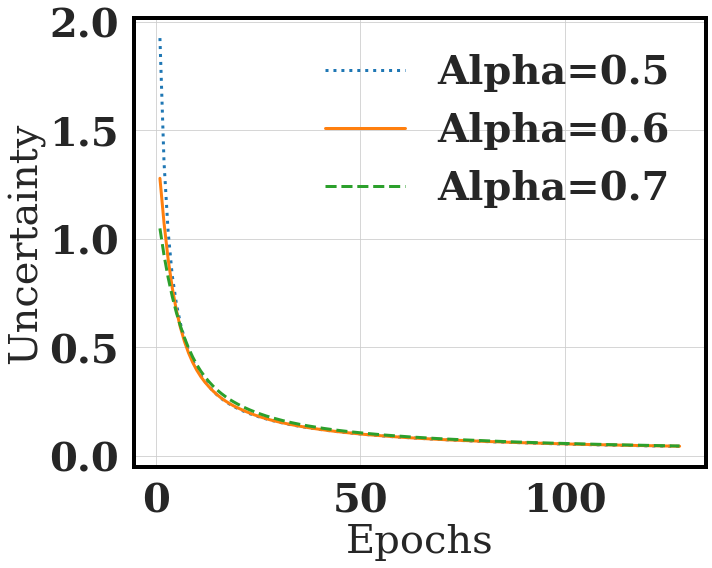

In [16]:
num_epochs = 128

plt.figure(figsize=(10, 8))

# Define specific line styles for each alpha value
line_styles = {0.5:':', 0.6: '-', 0.7: '--'}

for alpha in [0.5, 0.6, 0.7]:
    entropy_values = np.load(f'entropy_values_alpha_{alpha}.npy')
    plt.plot(range(1, num_epochs + 1), entropy_values, label=f'Alpha={alpha}', linewidth=3, linestyle=line_styles[alpha])

plt.xlabel('Epochs', fontsize=40)
plt.ylabel('Uncertainty', fontsize=40)
#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()

#plt.savefig("Images/Uncertainty_new.png", format='png', bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

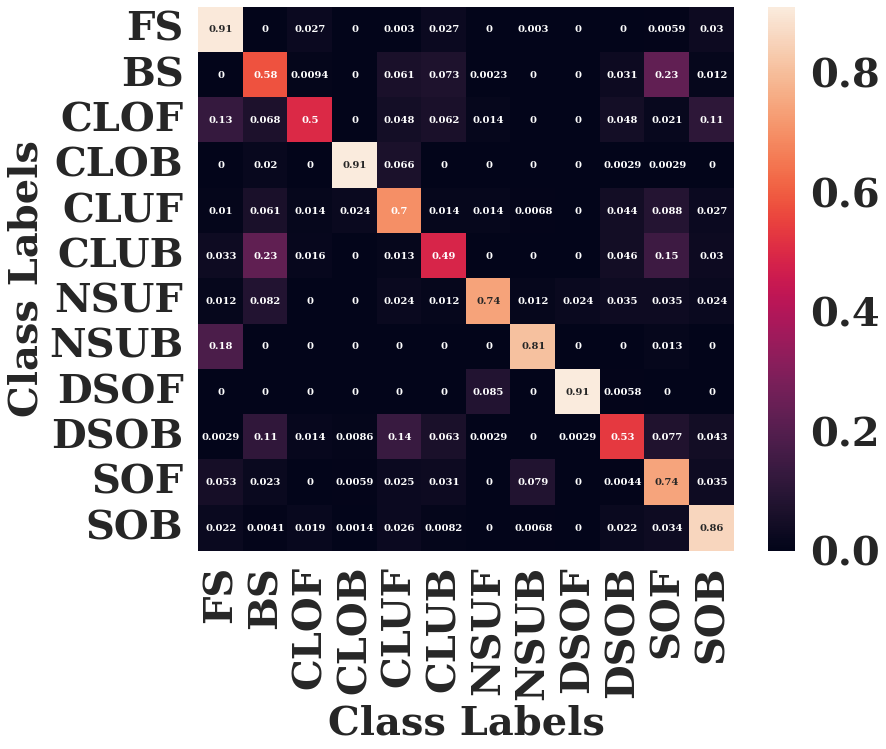

0.7208168371721598 0.7285259503905946 0.7225126422393838 0.743913642627469
Metrics saved to model_metrics.csv


In [119]:
model.eval()  # Set the model to evaluation mode
true_labels = []
pred_labels = []
embeddings = []

with torch.no_grad():  # No need to track gradients
    for source_batch, target_batch in zip(eval_source_dataloader, eval_target_dataloader):
        # Process source data
        #source_inputs, _ = source_batch
        #source_features = model(source_inputs.to(device))

        # Process target data    
        target_inputs, target_labels = target_batch
        target_inputs = target_inputs.to(device)
        target_labels = target_labels.to(device)
        target_outputs = model(target_inputs)
        target_features = target_outputs  
        _, predicted = torch.max(target_outputs, 1)
        true_labels.extend(target_labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())
        embeddings.append(target_features.detach().cpu().numpy())
        
    # Calculate the macro F1 score
    
#classes = ['Forehand Service','Backhand Service','Clear Lob Overhead Forehand','Clear Lob Overhead Backhand',
 #          'Clear Lob Underarm Forehand','Clear Lob Underarm Backhand','Net Shot Underarm Forehand',
  #         'Net Shot Underarm Backhand','Drop Shot Overhead Forehand','Drop Shot Overhead Backhand',
   #       'Smash Overhead Forehand','Smash Overhead Backhand']

classes = ['FS','BS','CLOF','CLOB','CLUF','CLUB','NSUF','NSUB','DSOF','DSOB','SOF','SOB']
    

# Confusion matrix
cf_matrix = confusion_matrix(true_labels, pred_labels)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True)
plt.xlabel('Class Labels', fontweight='semibold')
plt.ylabel('Class Labels', fontweight='semibold')
#plt.savefig("Images/New_Confusion_Matrix_UDA_CMMD_kernel_new.png", format='png',bbox_inches='tight', pad_inches=0,dpi=300)
plt.show()

macro_f1 = f1_score(true_labels, pred_labels, average='macro')
precision = precision_score(true_labels, pred_labels, average = 'macro')
recall = recall_score(true_labels, pred_labels, average = 'macro')
accuracy = accuracy_score(true_labels, pred_labels)
print(macro_f1, precision, recall, accuracy)

# Create a DataFrame to hold the metrics
data = {
    'Macro F1-Score': [macro_f1],
    'Precision': [precision],
    'Recall': [recall],
    'Accuracy': [accuracy]
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('model_metrics_only_UDA.csv', index=False)

print("Metrics saved to model_metrics.csv")
#CMMD
#0.732201330704369

#CMMD - Kernel
#0.8573672235010106

# MMD
#63.0323

#0.7555
#0.46310095495368747
#0.56

#.41484332087895753
#7211
#0.51
#0.46020205031139544
#0.5536922061946029
#CMMD - CO +MEAN+ KER
#0.6414527948589553


# Tsne Plots Visualization

In [229]:
model.eval()  # Set the model to evaluation mode
true_labels = []
pred_labels = []
embeddings = []

with torch.no_grad():  # No need to track gradients
    for source_batch, target_batch in zip(eval_source_dataloader, eval_target_dataloader):
        # Process source data
        #source_inputs, _ = source_batch
        #source_features = model(source_inputs.to(device))

        # Process target data    
        target_inputs, target_labels =  target_batch
        target_inputs = target_inputs.to(device)
        target_labels = target_labels.to(device)
        target_outputs = model(target_inputs)
        target_features = target_outputs  
        _, predicted = torch.max(target_outputs, 1)
        true_labels.extend(target_labels.cpu().numpy())
        pred_labels.extend(predicted.cpu().numpy())
        embeddings.append(target_features.detach().cpu().numpy())

In [1]:
# Prepare the data
embeddings = np.concatenate(embeddings, axis=0)
labels = np.array(true_labels)
label_mapping = {
    0: "Forehand Service", 1: "Backhand Service", 2: "Clear Lob Overhead Forehand", 3: "Clear Lob Overhead Backhand",
    4: "Clear Lob Underarm Forehand", 5: "Clear Lob Underarm Backhand", 6: "Net Shot Underarm Forehand",
    7: "Net Shot Underarm Backhand", 8: "Drop Shot Overhead Forehand", 9: "Drop Shot Overhead Backhand",
    10: "Smash Overhead Forehand", 11: "Smash Overhead Backhand"}

# Convert numerical labels to categorical names
labels= [label_mapping[label] for label in labels]

tsne_df = pd.DataFrame(embeddings)
tsne_df.columns = ["ft-"+str(i) for i in range(0,tsne_df.shape[1])]
tsne_df['Label']=labels
tsne_df.shape
tsne_df.head(5)

tsne = TSNE(n_components=2, verbose=1, perplexity=125, n_iter=600)
tsne_results = tsne.fit_transform(tsne_df[[cols for cols in tsne_df.columns if 'ft' in cols]].values)
tsne_df['tsne-three'] = tsne_results[:,0]
tsne_df['tsne-four'] = tsne_results[:,1]

lm = sns.lmplot(x='tsne-three',
                y='tsne-four',
                data=tsne_df,
                fit_reg=False,
                legend=False,  # Enable automatic legend to later adjust it
                height=10,
                hue='Label',
                scatter_kws={"s": 100, "alpha": 1})  # Adjust 's' for the size of scatter plot markers

plt.rcParams["axes.labelweight"] = "semibold"
plt.xlabel('t-SNE-1', fontweight='semibold', fontsize='40')
plt.ylabel('t-SNE-2', fontweight='semibold', fontsize='40')
plt.xticks(fontsize=35)
plt.yticks(fontsize=35) 
plt.tight_layout(pad=1.9, w_pad=4.0, h_pad=4.0)

# Adjusting the legend position properly
# Access the FacetGrid object to manipulate the legend
# Using `bbox_to_anchor` with adjusted values to place the legend outside the plot to the right center
plt.subplots_adjust(right=0.85)  # Adjust subplot params to give the legend enough space
legend = plt.legend(loc='center right', bbox_to_anchor=(2, 0.5), ncol=1, fancybox=True, shadow=True, fontsize='20')

# Increasing the linewidth of the legend markers
for legobj in legend.legendHandles:
    legobj.set_linewidth(3.0)

plt.savefig("Images/uDAR_BAR.png", format='png', bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

NameError: name 'np' is not defined